In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
date_columns = ['expiration_date', 'registration_init_time']

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv', index_col=0)
item_data = pd.read_csv('songs.csv')
user_data = pd.read_csv('members.csv', parse_dates=date_columns)

C:\Users\Hariom Goel\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
all_data = pd.concat([train_data, test_data], sort=True)

all_data = all_data.merge(item_data, on='song_id', how='left')
all_data = all_data.merge(user_data, on='msno', how='left')

In [5]:
all_data.shape

(9934208, 18)

In [6]:


all_data.head()

,msno,song_id,source_screen_name,source_system_tab,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,Explore,explore,online-playlist,1.0,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,1,0,NaN,7,2012-01-02,2017-10-05
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,Local playlist more,my library,local-playlist,1.0,284584.0,1259,Various Artists,NaN,NaN,52.0,13,24,female,9,2011-05-25,2017-09-11
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,Local playlist more,my library,local-playlist,1.0,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,13,24,female,9,2011-05-25,2017-09-11
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,Local playlist more,my library,local-playlist,1.0,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,13,24,female,9,2011-05-25,2017-09-11
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,Explore,explore,online-playlist,1.0,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,1,0,NaN,7,2012-01-02,2017-10-05


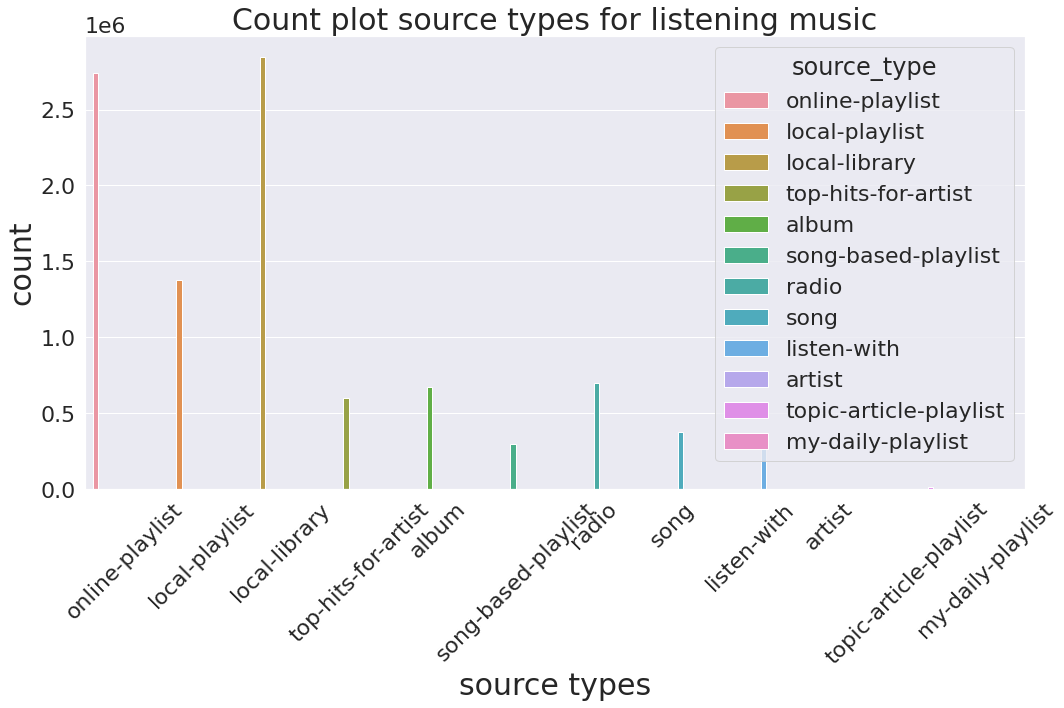

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=all_data)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot source types for listening music',fontsize=30)
plt.tight_layout()

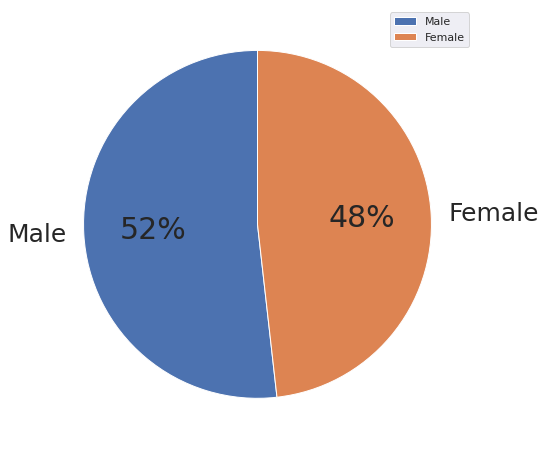

In [15]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 30.0
labels = ['Male','Female']
plt.figure(figsize = (8, 8))
sizes = pd.value_counts(all_data.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

In [ ]:
all_data.isnull().any()

msno                      False
song_id                   False
source_screen_name         True
source_system_tab          True
source_type                True
target                     True
song_length                True
genre_ids                  True
artist_name                True
composer                   True
lyricist                   True
language                   True
city                      False
bd                        False
gender                     True
registered_via            False
registration_init_time    False
expiration_date           False
dtype: bool

In [ ]:
enc = LabelEncoder()

for col in [
    'msno', 'song_id', 'source_screen_name', 
    'source_system_tab', 'source_type', 'genre_ids', 
    'artist_name', 'composer', 'lyricist', 'gender'
]:
    all_data[col] = enc.fit_transform(all_data[col].fillna('nan'))
    
for col in ['language', 'city', 'registered_via']:
    all_data[col] = enc.fit_transform(all_data[col].fillna(-2))

all_data['time'] = all_data.index / len(all_data)
n = len(train_data)

In [ ]:
all_data.isnull().sum()

msno                            0
song_id                         0
source_screen_name              0
source_system_tab               0
source_type                     0
target                    2556790
song_length                   139
genre_ids                       0
artist_name                     0
composer                        0
lyricist                        0
language                        0
city                            0
bd                              0
gender                          0
registered_via                  0
registration_init_time          0
expiration_date                 0
time                            0
dtype: int64

In [ ]:
all_data_no_na = all_data.copy()
all_data_no_na.replace(["NaN", 'NaT'], np.nan, inplace = True)
all_data_no_na = all_data_no_na.dropna()
all_data_no_na.isnull().sum()

msno                      0
song_id                   0
source_screen_name        0
source_system_tab         0
source_type               0
target                    0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
time                      0
dtype: int64

In [ ]:
display(all_data_no_na[:10])
len(all_data_no_na)

,msno,song_id,source_screen_name,source_system_tab,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,time
0,9176,86884,7,1,7,1.0,206471.0,307,3784,16653,26024,9,0,0,2,2,2012-01-02,2017-10-05,0.000000e+00
1,19273,260594,8,3,4,1.0,284584.0,97,36867,74276,26024,9,11,24,0,3,2011-05-25,2017-09-11,1.006623e-07
2,19273,140755,8,3,4,1.0,225396.0,97,24601,51540,26024,9,11,24,0,3,2011-05-25,2017-09-11,2.013246e-07
3,19273,27577,8,3,4,1.0,255512.0,6,31651,41991,26024,1,11,24,0,3,2011-05-25,2017-09-11,3.019868e-07
4,9176,38706,7,1,7,1.0,187802.0,2,5190,9701,26024,9,0,0,2,2,2012-01-02,2017-10-05,4.026491e-07
5,9176,35087,7,1,7,1.0,247803.0,97,9452,63673,26024,9,0,0,2,2,2012-01-02,2017-10-05,5.033114e-07
6,19273,221459,8,3,4,1.0,229982.0,371,3348,66331,22941,6,11,24,0,3,2011-05-25,2017-09-11,6.039737e-07
7,9176,258674,7,1,7,1.0,181115.0,2,35342,67760,26024,9,0,0,2,2,2012-01-02,2017-10-05,7.046359e-07
8,31394,10642,8,3,3,1.0,278964.0,200,25767,60384,26024,9,13,26,1,3,2011-11-07,2018-03-04,8.052982e-07
9,31394,109197,8,3,3,1.0,257369.0,371,25767,60384,26024,9,13,26,1,3,2011-11-07,2018-03-04,9.059605e-07


7377304

In [ ]:
y = all_data_no_na[['target']]
X = all_data_no_na.drop(['target'], axis = 1)

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.4,random_state=1)
test_X, val_X, test_y, val_y = train_test_split(test_X,test_y,test_size=0.5,random_state=1)

In [ ]:
ratio_1 = np.sum(train_y[train_y['target'] == 1]) / len(train_y)
print(ratio_1)

target    0.503572
dtype: float64


In [ ]:
print(len(train_X),len(train_y))
print(len(val_X),len(val_y))
print(len(test_X),len(test_y))

4426382 4426382
1475461 1475461
1475461 1475461


In [ ]:
train_tiny_X = train_X[:10000]
train_tiny_y = train_y[:10000]
train_tiny_X.to_csv('train_tiny_X.csv')
train_tiny_y.to_csv('train_tiny_Y.csv')
display(train_tiny_y)


,target
2942719,0.0
4875524,0.0
6589819,0.0
1172060,1.0
2069395,0.0
...,...
779258,1.0
4950642,1.0
4451788,0.0
2824944,0.0


In [ ]:
train_X.to_csv('train_X.csv')
test_X.to_csv('test_X.csv')
val_X.to_csv('valid_X.csv')
train_y.to_csv('train_Y.csv')
test_y.to_csv('test_Y.csv')
val_y.to_csv('valid_Y.csv')

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

import lightgbm as lgb
import xgboost as xgb
import sklearn.datasets
import gc

In [ ]:
def date_to_int(column, base_date=datetime.strptime('2000-01-01', "%Y-%m-%d")):
    
    def date_diff(date):
        date = datetime.strptime(date, "%Y-%m-%d")
        return (date - base_date).days
    
    return column.apply(date_diff)

def convert_date_columns_to_int(dataframes, cols=['registration_init_time', 'expiration_date'], saving=True):
    count = 0
    total = len(dataframes)
    for df_name, df in dataframes.items():
        count += 1
        print("Starting {} ...".format(df_name))
        for col in cols:
            df[col+'_int'] = date_to_int(df[col])
        df = df.drop(columns=cols)
        dataframes[df_name] = df
        
        if saving:
            print("Saving {} ...".format(df_name))
            df.to_csv('music_data/'+ df_name + '_date_converted.csv')
        
        print("====== Done {} / {} ======".format(count, total))
    return dataframes

In [ ]:
train_X.columns

Index(['msno', 'song_id', 'source_screen_name', 'source_system_tab',
       'source_type', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'time'],
      dtype='object')

In [ ]:
test_X.drop('registration_init_time', inplace=True, axis=1)

In [ ]:
train_X

,msno,song_id,source_screen_name,source_system_tab,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,time
2942719,8145,253733,16,6,8,267517.0,371,4252,8389,2681,9,0,0,2,1,0.296221
4875524,5224,145235,16,6,8,200620.0,371,34892,74276,26024,6,3,41,1,2,0.490781
6589819,5474,22231,11,0,7,213342.0,371,20609,27775,9110,9,0,0,2,1,0.663346
1172060,23177,70181,8,3,3,262246.0,371,44425,83027,34734,2,0,0,2,0,0.117982
2069395,3269,128141,12,2,2,310753.0,371,42400,81151,32836,2,0,0,2,2,0.208310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491269,25792,347210,0,0,0,643134.0,427,41245,74276,26024,1,19,34,0,3,0.049452
3937406,4175,60995,8,3,3,282122.0,364,44037,76813,30697,2,11,39,1,3,0.396348
6762488,29487,4574,17,7,9,289018.0,371,39901,75563,33054,2,0,0,2,2,0.680727
4686134,12562,403226,0,0,0,187663.0,349,3289,74276,26024,6,0,0,2,2,0.471717


In [ ]:

def run_lgbc(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "binary",
        "metric" : "binary_logloss", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)

    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y

In [ ]:
modelC, pred_val_y = run_lgbc(train_X, train_y['target'], val_X, val_y['target'])
print(classification_report(val_y['target'], modelC.predict(val_X)>0.5))
print(roc_auc_score(val_y['target'], modelC.predict(val_X)))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.626298
[200]	valid_0's binary_logloss: 0.621649
[300]	valid_0's binary_logloss: 0.618522
[400]	valid_0's binary_logloss: 0.616031
[500]	valid_0's binary_logloss: 0.613815
[600]	valid_0's binary_logloss: 0.61189
[700]	valid_0's binary_logloss: 0.610383
[800]	valid_0's binary_logloss: 0.608579
[900]	valid_0's binary_logloss: 0.607129
[1000]	valid_0's binary_logloss: 0.605955
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.605955
              precision    recall  f1-score   support

         0.0       0.66      0.68      0.67    732500
         1.0       0.68      0.66      0.67    742961

    accuracy                           0.67   1475461
   macro avg       0.67      0.67      0.67   1475461
weighted avg       0.67      0.67      0.67   1475461

0.732885798871027


In [ ]:
def run_xgb(X_train, y_train, X_val, y_val):
    params = {'objective': 'binary:logistic',
              #'eval_metric':"binary_logloss",
              'eta': 0.001,
              'max_depth': 10,
              'subsample': 0.6,
              'colsample_bytree': 0.6,
              'alpha':0.001,
              'random_state': 42,
              'silent': True}

    xgb_train_data = xgb.DMatrix(X_train.values, y_train.values)
    xgb_val_data = xgb.DMatrix(X_val.values, y_val.values)
    #xgb_test_data = xgb.DMatrix(X_test.values, y_test.values)
    #xgb_submit_data = xgb.DMatrix(X_test)
    model = xgb.train(params, xgb_train_data, 
                      num_boost_round=2000, 
                      evals= [(xgb_train_data, 'train'), (xgb_val_data, 'valid')],
                      early_stopping_rounds=100, 
                      verbose_eval=10
                     )

    y_pred_train = model.predict(xgb_train_data, ntree_limit=model.best_ntree_limit)
    y_pred_val = model.predict(xgb_val_data, ntree_limit=model.best_ntree_limit)
    #y_pred_test = model.predict(xgb_test_data, ntree_limit=model.best_ntree_limit)
    #y_pred_submit = model.predict(xgb_submit_data, ntree_limit=model.best_ntree_limit)

    return model, y_pred_val

In [ ]:
xgb_model, xgb_preds_val = run_xgb(train_X,train_y['target'], val_X, val_y['target'])

In [ ]:
def run_lgbc(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "binary",
        "metric" : "binary_logloss", 
        "num_leaves" : 15,
        "min_child_samples" : 100,
        "learning_rate" : 0.5,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 10000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=500)
                      #,learning_rates=[0.05] * 1500 + [0.01] * 500)

    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y

In [ ]:
modelC, pred_val_y = run_lgbc(train_X, train_y['target'], val_X, val_y['target'])
y_pred =  modelC.predict(val_X)
print(classification_report(val_y['target'], y_pred>0.5))
print(roc_auc_score(val_y['target'], y_pred))

Training until validation scores don't improve for 100 rounds.
[500]	valid_0's binary_logloss: 0.604219
[1000]	valid_0's binary_logloss: 0.594272
[1500]	valid_0's binary_logloss: 0.587371
[2000]	valid_0's binary_logloss: 0.581935
[2500]	valid_0's binary_logloss: 0.578018
[3000]	valid_0's binary_logloss: 0.574444
[3500]	valid_0's binary_logloss: 0.571531
[4000]	valid_0's binary_logloss: 0.568612
[4500]	valid_0's binary_logloss: 0.566356
[5000]	valid_0's binary_logloss: 0.564643
[5500]	valid_0's binary_logloss: 0.562914
[6000]	valid_0's binary_logloss: 0.561494
[6500]	valid_0's binary_logloss: 0.560353
[7000]	valid_0's binary_logloss: 0.559532
[7500]	valid_0's binary_logloss: 0.558762
[8000]	valid_0's binary_logloss: 0.557887
[8500]	valid_0's binary_logloss: 0.556754
[9000]	valid_0's binary_logloss: 0.555952
[9500]	valid_0's binary_logloss: 0.554956
[10000]	valid_0's binary_logloss: 0.554242
Did not meet early stopping. Best iteration is:
[10000]	valid_0's binary_logloss: 0.554242
      

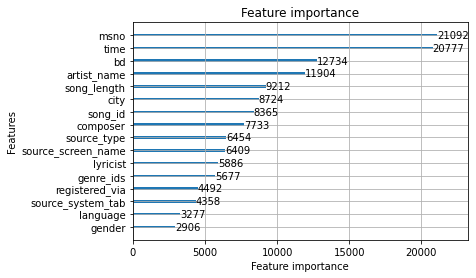

In [ ]:
lgb.plot_importance(modelC)
feature_imp=modelC.feature_importance()

In [ ]:
y_pred.shape

(1475461,)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
songs = songs.sample(n=5000).drop('link', axis=1).reset_index(drop=True)

In [27]:
songs['text'] = songs['text'].str.replace(r'\n', '')

In [28]:
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')

In [29]:
lyrics_matrix = tfidf.fit_transform(songs['text'])

In [30]:
cosine_similarities = cosine_similarity(lyrics_matrix)

In [31]:
similarities = {}

In [32]:
for i in range(len(cosine_similarities)): 
    similar_indices = cosine_similarities[i].argsort()[:-50:-1] 
    similarities[songs['song'].iloc[i]] = [(cosine_similarities[i][x], songs['song'][x], songs['artist'][x]) for x in similar_indices][1:]

In [43]:
class ContentBasedRecommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix

    def _print_message(self, song, recom_song):
        rec_items = len(recom_song)
        
        print(f'The {rec_items} recommended songs for {song} are:')
        for i in range(rec_items):
            print(f"Number {i+1}:")
            print(f"{recom_song[i][1]} by {recom_song[i][2]}") 
            print("--------------------")
        
    def recommend(self, recommendation):
        # Get song to find recommendations for
        song = recommendation['song']
        # Get number of songs to recommend
        number_songs = recommendation['number_songs']
        # Get the number of songs most similars from matrix similarities
        recom_song = self.matrix_similar[song][:number_songs]
        # print each item
        self._print_message(song=song, recom_song=recom_song)

In [44]:
recommedations = ContentBasedRecommender(similarities)

In [45]:
recommendation = {
    "song": songs['song'].iloc[120],
    "number_songs": 4 
}

In [46]:
recommedations.recommend(recommendation)

The 4 recommended songs for Bedroom Thang are:
Number 1:
I Need You by Foreigner
--------------------
Number 2:
Emotion by Barbra Streisand
--------------------
Number 3:
If Only by Hanson
--------------------
Number 4:
I Don't Need Anyone by Kylie Minogue
--------------------


In [47]:
recommendation2 = {
    "song": songs['song'].iloc[1],
    "number_songs": 4 
}

In [48]:
recommedations.recommend(recommendation2)

The 4 recommended songs for All This Time are:
Number 1:
River Of Tears by Bonnie Raitt
--------------------
Number 2:
I See A Boat On A River by Boney M.
--------------------
Number 3:
Shall We Gather At The River? by Randy Travis
--------------------
Number 4:
Red River by Alabama
--------------------
